# CHAPTER 27: Mean-Square-error Inference

### This code  Example 8 and plots Figure 11 from Chapter 27: Mean-Square-Error Inference (vol II)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## Illustrating the bias--variance relation

We reconsider the setting of Example $27.3$ where we are interested in estimating a binary random variable $\mathbf{x}\in\{\pm 1\}$ from noisy measurements $\mathbf{y}=\mathbf{x}+\mathbf{v}$ under zero-mean Gaussian noise with variance $\sigma_v^2$. We know from the derivation that led to ($27.33$), as well as from the result of Prob. $27.2$, that the optimal MSE estimator for $\mathbf{x}$ is given by 

$$
\widehat{\mathbf{x}} = \tanh\left(\frac{\mathbf{y}}{\sigma_v^2}\right) \quad \text{(27.84)}
$$

We simulate this solution by generating $N=50,000$ random samples $\mathbf{x}$ chosen uniformly from $\{+1,-1\}$. We index the samples by the letter $n$ and write $x_n$ to refer to the $n$th sample. Each $x_n$ is perturbed by a noise component $v_n$ generated from a zero-mean Gaussian distribution with variance $\sigma_v^2=0.1$. The observation is denoted by $y_n=x_n+v_n$. For each of the noisy measurements $y_n$, expression ($27.84$) is used to estimate the corresponding $x_n$ as follows:

$$
\widehat{x}_n = \tanh\left(\frac{y_n}{\sigma_v^2}\right) \quad \text{(27.85)}
$$

where we are assuming knowledge of the noise variance in this example. The MSE for this  construction can be estimated by computing the sample error variance over all $N=50,000$ trials:

$$
\text{MMSE} \approx \frac{1}{N} \sum_{n=0}^{N-1} (x_n - \widehat{x}_n)^2 \approx 0.0021 \quad \text{(optimal MSE)} \quad \text{(27.86)}
$$

### _First-order linear estimator_

Next, we examine four suboptimal estimators, evaluate their MSEs from data measurements, and verify that these MSEs satisfy the bias--variance relation ($27.75$).

We consider initially a first-order linear regression model for estimating $x$ from $y$ of the form:

$$
\widehat{x}_a = \alpha^{\star} y - \theta^{\star} \quad \text{(27.87)}
$$

where the parameters $(\alpha^{\star},\theta^{\star})$ are determined from minimizing the squared  error defined earlier by ($27.68$):

$$
(\alpha^{\star}, \theta^{\star}) \triangleq \underset{\alpha, \theta}{\mbox{argmin}} \left\{\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - (\alpha y_n - \theta)\right)^2\right\} \quad \text{(27.88)}
$$

We already know that the solution is given by expressions ($27.70a$)--($27.70b$). Before examining the performance of this estimator, and before introducing three other suboptimal estimators of higher order, we will first rewrite model ($27.87$) in a useful vector form that will be more convenient for these other estimators.

Thus, note that we can rewrite ($27.87$) as 

$$
\widehat{x}_a = \begin{bmatrix} 1 & y \end{bmatrix} \begin{bmatrix} -\theta^{\star} \\ \alpha^{\star} \end{bmatrix} \quad \text{(27.89)}
$$

We introduce the matrix and vector quantities:

$$
H \triangleq \begin{bmatrix} 1 & y_0 \\ 1 & y_1 \\ 1 & y_2 \\ \vdots & \vdots \\ 1 & y_{N-1} \end{bmatrix}, \quad d \triangleq \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{N-1} \end{bmatrix}, \quad w \triangleq \begin{bmatrix} -\theta \\ \alpha \end{bmatrix} \quad \text{(27.90)}
$$

so that problem ($27.88$) can be written more succinctly in the least-squares form:

$$
w^{\star} \triangleq \underset{w \in \mathbb{R}^{2}}{\mbox{argmin}} \, \|d - Hw\|^2 \quad \text{(4)} \quad \text{(27.91)}
$$

where the scaling by $1/N$ is inconsequential and is removed. If we set the gradient vector of this cost function relative to $w$ to zero at $w = w^{\star}$, i.e.,

$$
2H^T(d - Hw)\Biggr|_{w = w^{\star}} = 0 \quad \text{(27.92)}
$$

we find that the solution $w^{\star}$, whose entries are $w^{\star} = \begin{bmatrix} -\theta^{\star} \\ \alpha^{\star} \end{bmatrix}$, is given by

$$
w^{\star} = (H^T H)^{-1} H^T d \quad \text{(27.93)}
$$

It is straightforward to verify that this expression for $w^{\star}$ leads to the same expressions ($27.70a$)--($27.70b$) for $(\alpha^{\star}, \theta^{\star})$ --- see Prob. $27.14$. We now proceed to evaluate the MSE, bias effect, and variance effect for this first-order estimator from experimental data.

For this purpose, we perform the following repeated experiments to generate multiple data-based estimators and then use these estimators to approximate the bias and variance effects. We index each experiment by the letter $\ell$, for $\ell=1,2,\ldots, L$, where $L=200$. For each experiment, we generate $N_{\ell}=1000$ data samples $\{(x_n^{(\ell)},y_n^{(\ell)})\}$ in the same manner described before and use these samples to construct the data quantities $\{H^{(\ell)},d^{(\ell)}\}$ and estimate the parameters $(\alpha^{(\ell)\star},\theta^{(\ell)\star})$ for the $\ell$th experiment. In other words, each collection of data points $\{(x_n^{(\ell)},y_n^{(\ell)})\}$ gives rise to an estimator whose mapping is given by:

$$
\widehat{x}_a^{(\ell)} = \alpha^{(\ell)\star} y - \theta^{(\ell)\star}, \quad \ell = 1,2,\ldots,L \quad \text{(27.94)}
$$

Obviously, if we now apply these estimators to the original $N=50,000$ data points $\{(x_n,y_n)\}$, then each of them will take the same observation $y_n$ and generate an estimate $\widehat{x}_n^{(\ell)}$ for the corresponding $x_n$. We therefore note that, for the same observation $y$, there will be some variability in the estimates for its $x$-component. This variability gives rise to the bias and variance effects, whose sizes can be evaluated as explained next.

First, for each $y_n$ we obtain a collection of $L$-estimates for its $x$-component denoted by:

$$
\widehat{x}_n^{(\ell)} = {\alpha}^{(\ell)\star} y_n - {\theta}^{(\ell)\star}, \quad \ell = 1,2,\ldots,L \quad \text{(27.95)}
$$

We use these estimates to estimate the MSE for the first-order estimator by using:

\begin{align}
\text{mse}_1 &\equiv \mathbb{E}_{\mathbf{x},\mathbf{y},\mathbf{\cal D}}\left(\mathbf{x} - c_{\mathbf{\cal D}}(\mathbf{y})\right)^2 \\
&\approx \frac{1}{L}\sum_{\ell=1}^{L}\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{(\ell)}\right)^2\right) \\
&\approx 0.0913 \quad \text{(27.96)}
\end{align}

where the subscript $1$ refers to the fact that this is the MSE for the first-order estimator, and where we are averaging over all experiments.

Next, we evaluate the bias and variance effects. If we average the model parameters $\{\alpha^{(\ell)\star},\theta^{(\ell)\star}\}$ across all $L$ experiments, we obtain an approximation for the mean estimator, $\mathbb{E}[c_{\mathbf{\cal D}}(y)]$, whose structure will take the form:

$$
\widehat{x}_a^{\text{mean}} = \bar{\alpha}^{\star} y - \bar{\theta}^{\star} \quad \text{(mean estimator, }\mathbb{E}[c_{\mathbf{\cal D}}(y)]\text{)} \quad \text{(27.97)}
$$

in terms of the sample average coefficients:

$$
\bar{\alpha}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L} \alpha^{(\ell)\star}, \quad \bar{\theta}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L}\theta^{(\ell)\star} \quad \text{(27.98)}
$$

For each of the original measurements $y_n$, we use this average estimator to estimate its $x$-component and denote the estimates by:

$$
\widehat{x}_n^{\text{mean}} = \bar{\alpha}^{\star} y_n - \bar{\theta}^{\star} \quad \text{(27.99)}
$$

These estimates can be used to approximate the bias term relative to the earlier optimal estimates $\widehat{x}_n$:
\begin{align}
\text{bias}_1^2 &\triangleq \mathbb{E}_{\mathbf{y}}\left(c^o(\mathbf{y})-\mathbb{E}[c_{\mathbf{\mathcal{D}}}(\mathbf{y})]\right)^2 \\
&\approx \frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n - \widehat{x}_n^{\text{mean}}\right)^2 \\
&\approx 0.0893 \quad \text{(27.100)}
\end{align}

We similarly approximate the variance effect by using:
\begin{align}
\text{variance}_1 &\triangleq \mathbb{E}_{\mathbf{\cal D}}\left(c_{\mathbf{\cal D}}(\mathbf{y})-\mathbb{E}[c_{\mathbf{\mathcal{D}}}(\mathbf{y})]\right)^2 \\
&\approx \frac{1}{L}\sum_{\ell=1}^L\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n^{(\ell)} - \widehat{x}_n^{\text{mean}}\right)^2\right) \\
&\approx 0.0002 \quad \text{(27.101)}
\end{align}



### _Higher-order estimator_

We repeat similar calculations for higher-order estimators, such as a third-order estimator of the form:

$$
\widehat{x}_a = \alpha^{\star} y + \beta^{\star} y^2 + \lambda^{\star} y^3 - \theta^{\star} \quad \text{(27.102)}
$$

where the parameters $(\alpha^{\star},\beta^{\star},\lambda^{\star},\theta^{\star})$ are determined by minimizing the squared error defined by:

$$
(\alpha^{\star},\beta^{\star},\lambda^{\star},\theta^{\star}) \equiv \underset{\alpha,\beta,\lambda,\theta}{\mbox{argmin}}\Bigg\{\frac{1}{N}\sum_{n=0}^{N-1} \Bigl(x_n-(\alpha y + \beta y^2 + \lambda y^3 - \theta)\Bigr)^2\Bigg\}  \quad \text{(27.103)}
$$

The solution can be found by introducing the matrix and vector quantities:

$$
H \triangleq \begin{pmatrix}1&y_0&y_0^2&y_0^3\\1&y_1&y_1^2&y_1^3\\1&y_2&y_2^2&y_2^3\\\vdots&\vdots\\\vdots&\vdots&\vdots&\vdots\\1&y_{N-1}&y_{N-1}^2&y_{N-1}^3\end{pmatrix}, \quad d \triangleq \begin{pmatrix}x_0\\x_1\\x_2\\\vdots\\x_{N-1}\end{pmatrix}, \quad w \triangleq \begin{pmatrix}-\theta\\\alpha\\\beta\\\lambda\end{pmatrix} \quad \text{(27.104)}
$$

and considering the same least-squares problem ($27.91$) for which ($27.93$) continues to hold. We can then evaluate the MSE, bias effect, and variance effect for this third-order estimator as follows.

For each experiment with $N_{\ell}=1000$ data points $\{(x_n^{(\ell)},y_n^{(\ell)})\}$, we construct the data quantities $\{H^{(\ell)},d^{(\ell)}\}$ and estimate the parameter vector $w^{(\ell)\star}$. Then, the structure of the estimator resulting from the $\ell$th experiment is given by:

$$
\widehat{x}_a^{(\ell)} = h^T w^{(\ell)\star}, \quad \ell=1,2,\ldots,L \quad \text{(27.105)}
$$

where the data vector $h$ is constructed as follows:

$$
h = \begin{pmatrix}1\\y\\y^2\\y^3\end{pmatrix} \quad \text{(27.106)}
$$

We apply each of the estimators $w^{(\ell)\star}$ to the data vector $h_n$ corresponding to $y_n$ to estimate its $x$-component:

$$
\widehat{x}_n^{(\ell)} = h_n^T w^{(\ell)\star}, \quad \ell=1,2,\ldots,L \quad \text{(27.107)}
$$

and use these values to approximate the MSE for the third-order estimator by using:

\begin{align}
\text{mse}_3 &\equiv \mathbb{E}_{\mathbf{x},\mathbf{y},\mathbf{\cal D}}\left(\mathbf{x} - c_{\mathbf{\cal D}}(\mathbf{y})\right)^2 \\
&\approx \frac{1}{L}\sum_{\ell=1}^{L}\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{(\ell)}\right)^2\right) \\
&\approx 0.0305 \quad \text{(27.108)}
\end{align}

where the subscript $3$ refers to the fact that this is the MSE for the third-order estimator.

If we average the model parameters $\{w^{(\ell)\star}\}$ across the $L=200$ experiments we obtain an approximation for the mean estimator whose structure has the form:

$$
\widehat{x}_n^{\text{mean}} = h^T \bar{w}^{\star} \quad \text{(mean estimator, $\mathbb{E}[c_{{\mathcal{D}}}(y)]$)}
\quad \text{(27.109)}
$$

in terms of the average model:

$$
\bar{w}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L} w^{(\ell)\star} \quad \text{(27.110)}
$$

For each of the original measurements $y_n$, we use this average estimator to estimate its $x$-component as well and denote the estimates by:

$$
\widehat{x}_n^{\text{mean}} = h_n^T \bar{w}^{\star} \quad \text{(27.111)}
$$

These values can be used to approximate the bias term:

\begin{align}
\text{bias}_3^2 &\equiv \mathbb{E}_{\mathbf{y}}\left(c^o(\mathbf{y}) - \mathbb{E}[c_{{\mathcal{D}}}(\mathbf{y})]\right)^2 \\
&\approx \frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{\text{mean}}\right)^2 \\
&\approx 0.0283 \quad \text{(27.112)}
\end{align}

We similarly approximate the variance effect by computing:

\begin{align}
\text{variance}_3 &\equiv \mathbb{E}_{{\mathcal{D}}}\left(c_{{\mathcal{D}}}(\mathbf{y}) - \mathbb{E}[c_{{\mathcal{D}}}(\mathbf{y})]\right)^2 \\
&\approx \frac{1}{L}\sum_{\ell=1}^L\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n^{(\ell)} - \widehat{x}_n^{\text{mean}}\right)^2\right) \\
&\approx 0.0003 \quad \text{(27.113)}
\end{align}

We repeat the same construction for two other estimators of orders $5$ and $7$, respectively, where their $h_n$ vectors are constructed as follows:

\begin{align}
h_n = [1 \text{  } \mathcal{y}_n \text{  } \mathcal{y}_n^2 \text{  } \mathcal{y}_n^3 \text{  } \mathcal{y}_n^4 \text{  } \mathcal{y}_n^5] \quad (\text{5th order}) \quad \text{(27.114)} \\
h_n = [1 \text{  } \mathcal{y}_n \text{  } \mathcal{y}_n^2 \text{  } \mathcal{y}_n^3 \text{  } \mathcal{y}_n^4 \text{  } \mathcal{y}_n^5  \text{  } \mathcal{y}_n^6 \text{  } \mathcal{y}_n^7] \quad (\text{7th order}) \quad \text{(27.115)}
\end{align}

<table>
  <caption><b>Mean-square-error, bias, and variance sizes for data-based estimators of first, third, fifth, and seventh order.</b></caption>
  <tr style="background-color: lightgray;">
    <th>Order</th>
    <th>MSE</th>
    <th>Bias$^2$</th>
    <th>Variance</th>
    <th>MMSE+bias$^2$+variance</th>
  </tr>
  <tr>
    <td>optimal (MMSE)</td>
    <td>0.0021</td>
    <td>0</td>
    <td>0</td>
    <td>0.0021</td>
  </tr>
  <tr>
    <td>1</td>
    <td><b>0.0913</b></td>
    <td>0.0893</td>
    <td>0.0002</td>
    <td><b>0.0916</b></td>
  </tr>
  <tr>
    <td>3</td>
    <td><b>0.0305</b></td>
    <td>0.0283</td>
    <td>0.0003</td>
    <td><b>0.0307</b></td>
  </tr>
  <tr>
    <td>5</td>
    <td><b>0.0154</b></td>
    <td>0.0128</td>
    <td>0.0007</td>
    <td><b>0.0156</b></td>
  </tr>
  <tr>
    <td>7</td>
    <td><b>0.0096</b></td>
    <td>0.0068</td>
    <td>0.0010</td>
    <td><b>0.0099</b></td>
  </tr>
</table>

Table $27.4$ lists the MSEs, squared bias terms, and variance terms for all estimators considered in this example. It is seen that as the complexity of the estimator increases from first order toward seventh order, the MSE improves, its bias effect also improves, while its variance effect worsens---this behavior is also illustrated in Fig.$27.11$.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

N = 50000      # number of realizations y and x
L = 200        # how many experiments
ND = 1000      # how many data points per experiment
sigmav2 = 0.1  # noise variance

# Optimal mean-square-error estimator (conditional mean)
# generate data
x = np.zeros([N,1])
for n in range(N) :
 a= np.random.rand()
 if a >= 1/2 : # generate N realizations of x uniformly; either +1 or -1
   x[n] = +1
 else :
   x[n] = -1

v = np.sqrt(sigmav2)*np.random.randn(N,1) # vector of Gaussian noise samples
y = x + v # observations
x_hat = np.tanh(y/sigmav2)    # vector of optimal estimates of x; one for each observation
mean_optimal = np.mean(x_hat) # mean of optimal estimator; should be 0
mmse = 0

mmse = np.mean((x - x_hat) ** 2)  # mmse of optimal estimator

print('mean of optimal estimator (should be ~0) and its mmse')
print(mean_optimal, mmse)

#### Next we consider a data-based estimator: we fit a line into the data
C = np.zeros([N,L])  # saves the estimates for the original x's over all L experiments
C2 = np.zeros([N,L]) # fitting a cubic curve
C3 = np.zeros([N,L]) # fitting a curve of order 5
C4 = np.zeros([N,L]) # fitting a curve of order 7
w = np.zeros([2,L])  # saves regression vector for every experiment (to average later)
w2 = np.zeros([4,L])  # saves regression vector for every experiment (to average later)
w3 = np.zeros([6,L])  # saves regression vector for every experiment (to average later)
w4 = np.zeros([8,L])  # saves regression vector for every experiment (to average later)

xx = np.zeros([ND,1])
for s in range(L) : # generating experiments
   for n in range(ND) :
        a= np.random.rand()
        if a >= 1/2 : # generate ND realizations of (x,y) with x uniformly; either +1 or -1
            xx[n] = +1
        else :
            xx[n] = -1

   
   Yx = xx + np.sqrt(sigmav2)*np.random.randn(ND, 1) # measurement vector

   # fitting a line
   H = np.column_stack((np.ones([ND,1]), Yx))  # data matrix
   a = np.linalg.inv(H.T @ H) @ H.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w[:, s] = a[:, 0]
   C[:,s] = np.column_stack((np.ones([N,1]), y)) @ w[:,s]  # feeding original y to find hat_x_a

   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save = w[:,s]
   
   #fitting a cubic curve
   H2 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3))  # data matrix
   a = np.linalg.inv(H2.T @ H2) @ H2.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w2[:, s] = a[:, 0]
   C2[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3)) @ w2[:,s]  # feeding original y to find hat_x_a

    
   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_2 = w2[:,s]

   #fitting a 5-th order curve  

   H3 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3, Yx**4, Yx**5))  # data matrix
   a = np.linalg.inv(H3.T @ H3) @ H3.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w3[:, s] = a[:, 0]
   C3[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5)) @ w3[:,s]  # feeding original y to find hat_x_a
    
   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_3 = w3[:,s]
    
   #fitting a 7-th order curve  
   H4 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3, Yx**4, Yx**5, Yx**6, Yx**7))  # data matrix
   a = np.linalg.inv(H4.T @ H4) @ H4.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w4[:, s] = a[:, 0]
   C4[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5, y**6, y**7)) @ w4[:,s]  # feeding original y to find hat_x_a

   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_4 = w4[:,s]

w_bar = np.mean(w, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar = np.tile((np.column_stack((np.ones([N,1]), y)) @ w_bar).reshape(-1, 1), (1, L))

c_var  = (np.linalg.norm(C - c_bar, ord='fro'))**2 / ((N * L) - 1)   # variance effect
bias   = (np.linalg.norm(x_hat-np.mean(c_bar,axis=1).reshape(-1, 1)))**2/N     # squared bias effect of suboptimal estimator
mmse_c = (np.linalg.norm(C- x @ np.ones([1,L]),'fro'))**2/(N*L) # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal LINEAR estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c, mmse+bias+c_var)

print('mmse bias  variance Ec(D)')
print(mmse, bias, c_var, np.mean(np.mean(c_bar)))

# cubic curve
w_bar2 = np.mean(w2, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar2 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3)) @ w_bar2).reshape(-1, 1), (1, L))

c_var2  = (np.linalg.norm(C2-c_bar2,'fro'))**2/((N*L)-1);   # variance effect
bias2   = (np.linalg.norm(x_hat-np.mean(c_bar2,axis=1).reshape(-1, 1)))**2/N;     # squared bias effect of suboptimal estimator
mmse_c2 = (np.linalg.norm(C2-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal CUBIC estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c2, mmse+bias2+c_var2)

print('mmse bias  variance Ec(D)')
print(mmse, bias2, c_var2, np.mean(np.mean(c_bar2)))

# 5-th order  curve
w_bar3 = np.mean(w3, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar3 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5)) @ w_bar3).reshape(-1, 1), (1, L))

c_var3  = (np.linalg.norm(C3-c_bar3,'fro'))**2/((N*L)-1)  # variance effect
bias3  = (np.linalg.norm(x_hat-np.mean(c_bar3,axis=1).reshape(-1, 1)))**2/N;     # squared bias effect of suboptimal estimator
mmse_c3 = (np.linalg.norm(C3-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal 5-th ORDER estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c3, mmse+bias3+c_var3)

print('mmse bias  variance Ec(D)')
print(mmse, bias3, c_var3, np.mean(np.mean(c_bar3)))

# 7-th order  curve
w_bar4 = np.mean(w4, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar4 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5, y**6, y**7)) @ w_bar4).reshape(-1, 1), (1, L))            
c_var4  = (np.linalg.norm(C4-c_bar4,'fro'))**2/((N*L)-1);  # variance effect
bias4  = (np.linalg.norm(x_hat-np.mean(c_bar4,axis=1).reshape(-1, 1)))**2/N;      # squared bias effect of suboptimal estimator
mmse_c4 = (np.linalg.norm(C4-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal 7-th ORDER estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c4, mmse+bias4+c_var4)

print(mmse, bias4, c_var4, np.mean(np.mean(c_bar4))) 

D = np.reshape(C, (N * L, 1)) - np.tile(x, (L, 1))
D2 = np.reshape(C2, (N * L, 1)) - np.tile(x, (L, 1))
D3 = np.reshape(C3, (N * L, 1)) - np.tile(x, (L, 1))
D4 = np.reshape(C4, (N * L, 1)) - np.tile(x, (L, 1))

order = np.array([1, 3, 5, 7])
mmse_opt = np.full(len(order), mmse)
bias_vec = np.array([bias, bias2, bias3, bias4])
var_vec = np.array([c_var, c_var2, c_var3, c_var4])
mmse_vec = np.array([mmse_c, mmse_c2, mmse_c3, mmse_c4])

mean of optimal estimator (should be ~0) and its mmse
0.004261224189967102 0.002412546424713059
mmse optimal and mmse of suboptimal LINEAR estimator vs bias-variance relation: should be ~ equal
0.002412546424713059 0.09094761184328722 0.09078258293602005
mmse bias  variance Ec(D)
0.002412546424713059 0.08817377827855737 0.00019625823274962807 0.00014292665331275267
mmse optimal and mmse of suboptimal CUBIC estimator vs bias-variance relation: should be ~ equal
0.002412546424713059 0.031104520042743014 0.030947576943677044
mmse bias  variance Ec(D)
0.002412546424713059 0.02821696872639141 0.0003180617925725756 0.0028230572215112793
mmse optimal and mmse of suboptimal 5-th ORDER estimator vs bias-variance relation: should be ~ equal
0.002412546424713059 0.016752439373720698 0.0166028630581244
mmse bias  variance Ec(D)
0.002412546424713059 0.013471974989821927 0.0007183416435894148 0.003960408701664849
mmse optimal and mmse of suboptimal 7-th ORDER estimator vs bias-variance relation: sho

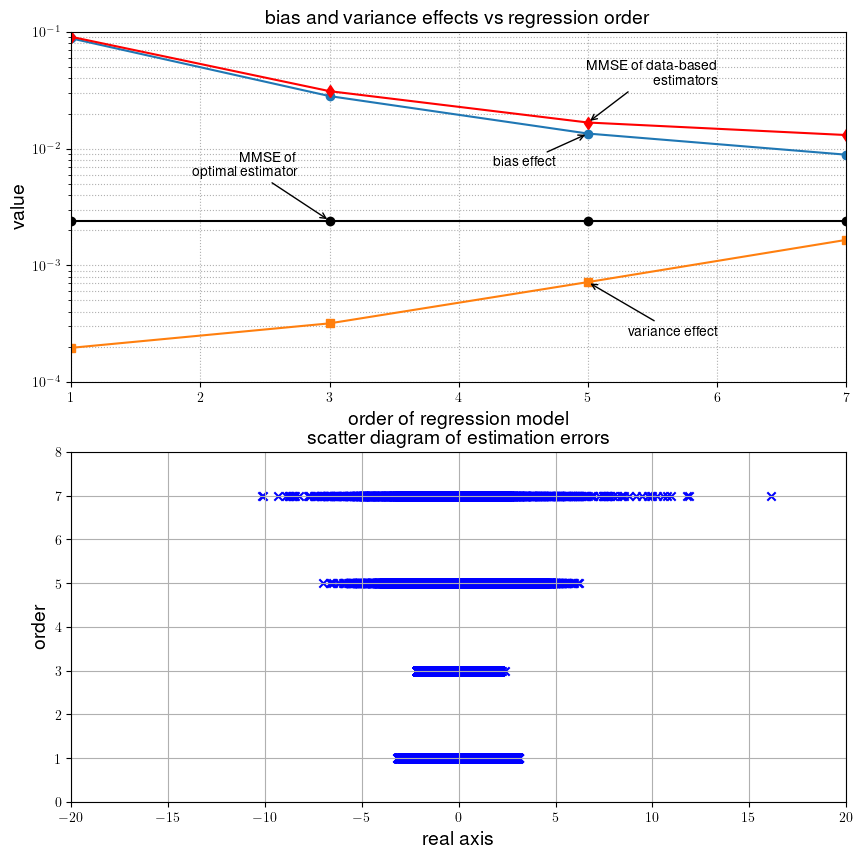

regression coefficients 1st order:
[0.00339876 0.91700871]
regression coefficients 3rd order:
[ 0.04166332  1.39285999 -0.03802656 -0.32680813]
regression coefficients 5th order:
[ 0.08094046  1.75773978 -0.15651882 -0.82742849  0.06039727  0.13955366]
regression coefficients 7th order:
[ 0.0972021   2.14715642 -0.28426134 -1.66533064  0.22009349  0.62336637
 -0.04755487 -0.078508  ]


In [61]:
# figure 11 (bias-variance relation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Plotting the figures
fig = plt.figure(figsize=(10, 10))

# Subplot 1
plt.subplot(211)
plt.semilogy(order, mmse_opt, '-ko', label='optimal mmse')
plt.semilogy(order, bias_vec, '-o', label='bias effect')
plt.semilogy(order, var_vec, '-s', label='variance effect')
plt.semilogy(order, mmse_vec, '-rd', label='mmse')
plt.xlabel('order of regression model', fontsize=14)
plt.ylabel('value', fontsize=14)
plt.title('bias and variance effects vs regression order', fontsize=14)
plt.grid(which='both', linestyle='dotted')
plt.axis([1, 7, 1/10000, 1/10])


# Add some annotations to the plot
plt.annotate('MMSE of data-based \n estimators', xy= (5, mmse_vec[2]), xytext= (6, 2* mmse_vec[2]), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('bias effect', xy= (5, bias_vec[2]), xytext= (4.75, bias_vec[2]/2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('MMSE of \n optimal estimator', xy= (3, mmse_opt[2]), xytext= (2.75, 2.3*mmse_opt[2]), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('variance effect', xy= (5, var_vec[2]), xytext= (6, var_vec[2]/3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')

# Subplot 2
plt.subplot(212)
plt.scatter(D, np.ones(N * L), c='blue', marker='x')
plt.scatter(D2, 3 * np.ones(N * L), c='blue', marker='x')
plt.scatter(D3, 5 * np.ones(N * L), c='blue', marker='x')
plt.scatter(D4, 7 * np.ones(N * L), c='blue', marker='x')
plt.xlabel('real axis', fontsize=14)
plt.ylabel('order', fontsize=14)
plt.title('scatter diagram of estimation errors', fontsize=14)
plt.grid()
plt.axis([-20, 20, 0, 8])

plt.show()

# Display regression coefficients for different orders
print('regression coefficients 1st order:')
print(w_save.T)
print('regression coefficients 3rd order:')
print(w_save_2.T)
print('regression coefficients 5th order:')
print(w_save_3.T)
print('regression coefficients 7th order:')
print(w_save_4.T)